In [1]:
from scipy.integrate import ode, solve_ivp
import os, sys, time, copy
import numpy as np
import matplotlib.pyplot as plt
import pickle
import bisect

sys.path.append('../')
from Protocols.pacing_protocol import PacingProtocol
from Protocols.leakstaircase import LeakStaircase

sys.path.append('../')
import scipy_simulator

sys.path.append('../models')
sys.path.append('../Lib')

import mod_protocols

C:\Anaconda3\envs\ml\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Anaconda3\envs\ml\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Anaconda3\envs\ml\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
from Models.ord2011 import ORD2011
'''
O'Hara-Rudy CiPA v1.0 (2011)
'''


model = ORD2011()
simulator = scipy_simulator.Simulator(model)

pre_step = 5000
prestep_protocol = mod_protocols.VoltageClampProtocol( [mod_protocols.VoltageClampStep(voltage=-87, duration=pre_step)] )
model.protocol = PacingProtocol(level=1, start=0, length=0.5, period=1000, multiplier=0, default_time_unit='ms')
t_span = (0, pre_step) 
simulator.simulate( t_span=t_span, method='BDF', max_step=0.5, atol=1e-06, rtol=1e-06)                 
model.y0[:] = simulator.solver.y[:,-1]  
print("Pre-simulation has been completed.")

Pre-simulation has been completed.


In [3]:
simulated_model_li = []
for i in range(3):
    start_time = time.time()
    
    model.cell.mode=i

    model.protocol = PacingProtocol(level=1, start=20, length=0.5, period=1000, multiplier=0, default_time_unit='ms')
    t_span = (0, 500)
    t_eval = np.linspace(0, t_span[1], 5000)  
    simulator.simulate(t_span=t_span, t_eval=t_eval, method='BDF', max_step=0.5, atol=1e-06, rtol=1e-06)   
    
    simulated_model_li.append(copy.copy(model))
    print("--- %s seconds ---"%(time.time()-start_time))

--- 2.620614767074585 seconds ---
--- 2.667025327682495 seconds ---
--- 2.73974609375 seconds ---


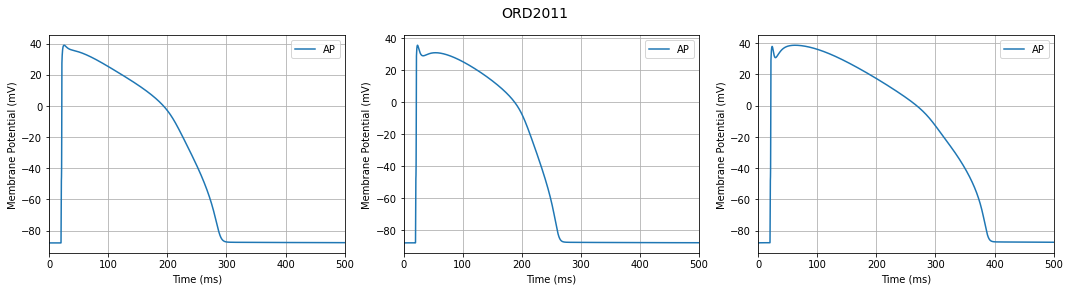

In [8]:
fig, axes = plt.subplots(1,3, figsize=(18,4))    
fig.suptitle(model.name, fontsize=14)
for i in range(3):
    model = simulated_model_li[i]
    
    # ax.set_title('Simulation %d'%(simulationNo))
    axes[i].set_xlim(model.times.min(), model.times.max())
    # ax.set_ylim(ylim[0], ylim[1])
    axes[i].set_ylabel('Membrane Potential (mV)')  
    axes[i].set_xlabel('Time (ms)')       
    axes[i].plot(model.times, model.V, label='AP')   
    # textstr = "GNa : %1.4f\nGNaL : %1.4f\nGto : %1.4f\nPCa : %1.4f\nGKr : %1.4f\nGKs : %1.4f\nGK1 : %1.4f\nGf : %1.4f"%(GNa/g_fc[0], \
    #             GNaL/g_fc[1], Gto/g_fc[2], PCa/g_fc[3], GKr/g_fc[4], GKs/g_fc[5], GK1/g_fc[6], Gf/g_fc[7])
    # props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # place a text box in upper left in axes coords
    #     ax.text(0.67, 0.60, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)    
    #     fig1 = plt.gcf()
    axes[i].legend()
    axes[i].grid()
    
plt.show()
fig.savefig(os.path.join('Results', "ORD2011"), dpi=100)

In [5]:
model.V

array([-87.93640635, -87.93177763, -87.92732737, ..., -87.51312944,
       -87.51328598, -87.51344244])

In [6]:
sys.path.append('../Lib')
import mod_trace as trace

In [7]:
i_trace = trace.Trace(protocol,
                      cell_params=None,
                      t=model.times,
                      y=model.V,
                      command_voltages=None,            
                      current_response_info=model.current_response_info,
                      default_unit=None)

max_contributions = i_trace.current_response_info.get_max_current_contributions(time=i_trace.t,
                                                                                window=2,
                                                                                step_size=2)
max_contributions

NameError: name 'protocol' is not defined

In [ ]:
fitness = max_contributions.loc[max_contributions['Current'] == 'I_Na'][
                'Contribution'].values[0]
fitness

In [ ]:
print("Complete")